# Comparing evaluation through detection and tracking metrics


#### Requirements
Firts you need to evaluate the outputs of the detectors and trackers with the commands:
```
python evaluation/mAP/main.py
python evaluation/scripts/run_mot_challenge.py --BENCHMARK <dataset_name> --USE_PARALLEL True --NUM_PARALLEL_CORES 4 --TRACKERS_TO_EVAL <tracker_name>
```

And generate a table with all the results. For that use the following command:
```
python evaluation/create_table.py
```

> You might need to use the `eval` environment to run the programs.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from scipy.spatial import distance

import auxiliar as aux

In [2]:
path = '../outputs/evaluation/'
file_name = 'all_metrics.csv'

tb = pd.read_csv(path + file_name, sep=",")

## Comparing detector and tracker outputs

Each detector and tracker applies different and various techniques to do their work. In this section we study the associative between trackers ussing different detectors outputs and the same ones.

In [3]:
aux.search(tb, 'uma', 'gt')

,Tracker,Detector,Dataset name,Set id,mAP,Precision,Recall,TP,FP,GT detections,...,ATA,FDA,SFDA,VACE_IDs,VACE_GT_IDs,num_non_empty_timesteps,Dets,GT_Dets,IDs,GT_IDs


In [4]:
result_m = aux.correlation_matrix(tb)
result_m2 = aux.correlation_matrix(tb, metrics='tracking')
result_m3 = aux.correlation_matrix(tb, metrics='detection')

aux.plot_matrix(result_m, aux.combinations(tb), plot_values=False)

uma faster_rcnn ----- uma faster_rcnn
uma faster_rcnn ----- uma faster_rcnn-fine-tune
uma faster_rcnn ----- uma faster_rcnn-mod-1
uma faster_rcnn ----- uma faster_rcnn-mod-2
uma faster_rcnn ----- uma faster_rcnn-mod-3
uma faster_rcnn ----- uma faster_rcnn-mod-4
uma faster_rcnn ----- uma public
uma faster_rcnn ----- uma gt


ZeroDivisionError: division by zero

## Comparing metrics

Metrics are used to score detectors and trackers, while deciding which ones perform better in the given scenarios. In this section we want to study the correlation between metrics and see if there is any case where the metrics are similar.

As we can see in the matrix of results there are some interesting results we want to discuss.

In detection metrics, *mAP* and *Recall* are high correlated.
 - precision and recall mostly opposite.
 - Precision and FP are opposite -> following the precision formula it has sense.
 - Recall and mAP are opposite of FN -> With the formula it has sense.
 
Tracking metrics:
 - HOTA and IDF1 are very similar. ATA is also similar to both.
 - MOTP is more similar to ATA than to MOTA.
 - MOTA is the opposite of IDSW -> ????

Mixed:
 - IDSW is similar to FP.
 - HOTA has a direct relation with mAP.
 - MOTA has a direct relation with Precision.

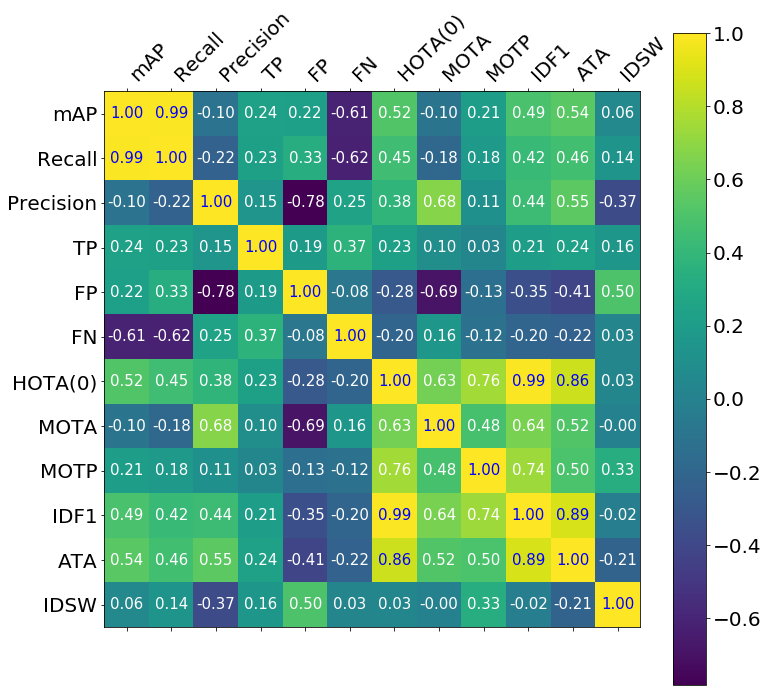

In [8]:
metrics = ['mAP', 'Recall', 'Precision', 'TP', 'FP', 'FN', 'HOTA(0)', 'MOTA', 'MOTP', 'IDF1', 'ATA', 'IDSW']
result_m = aux.correlation_metrics(tb, metrics)

aux.plot_matrix(result_m, metrics)

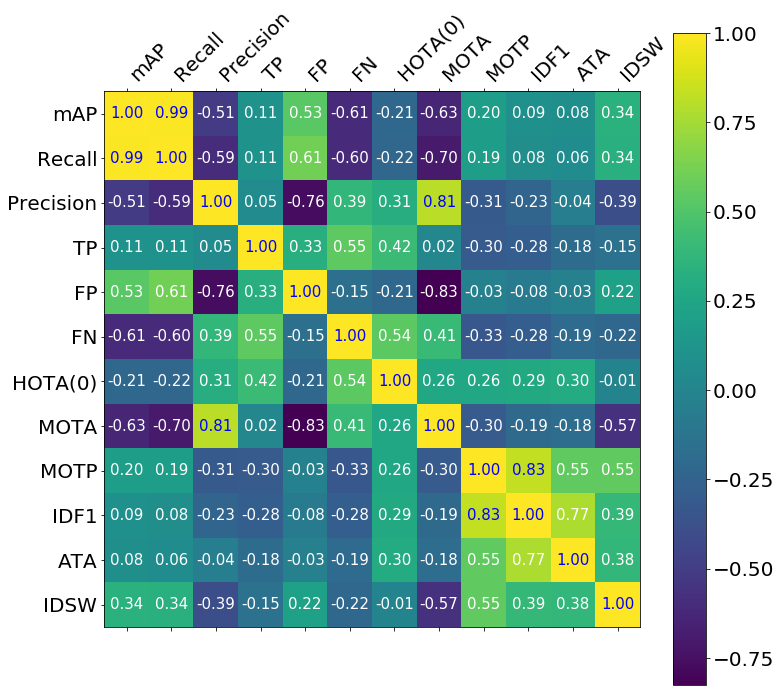

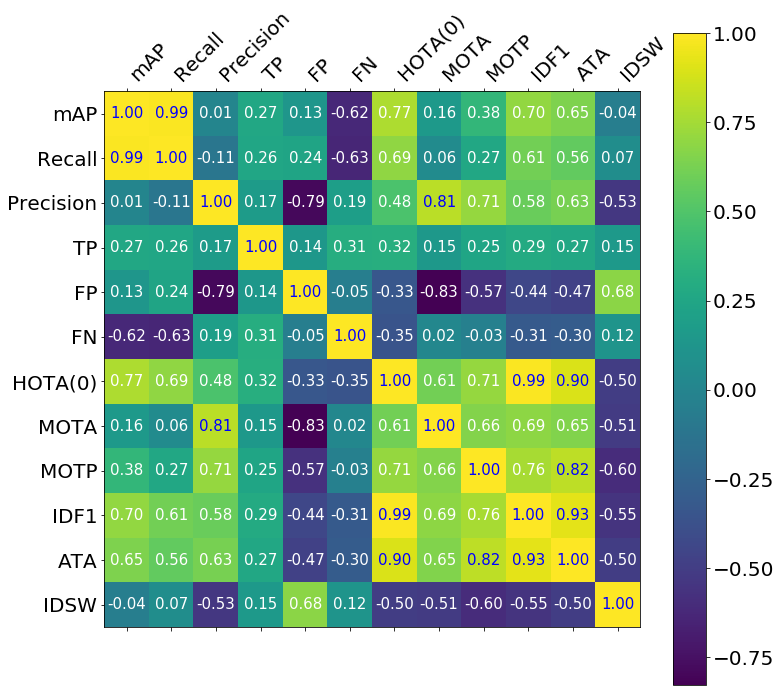

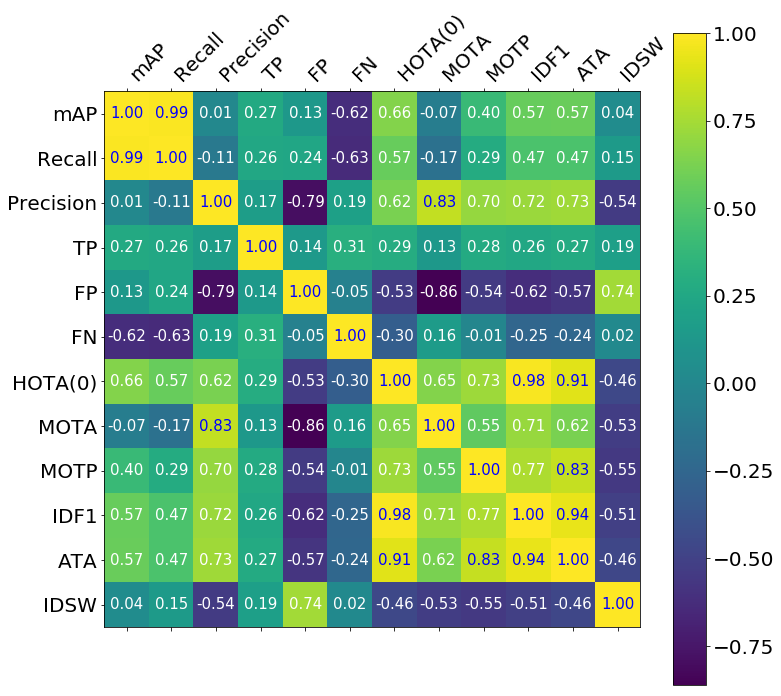

In [10]:
for trk in tb['Tracker'].unique():
    
    tb_search = aux.search(tb, trk)
    result_m = aux.correlation_metrics(tb_search, metrics)

    aux.plot_matrix(result_m, metrics)

In [11]:
tb['Tracker'].unique()

array(['uma', 'sort', 'deep_sort'], dtype=object)

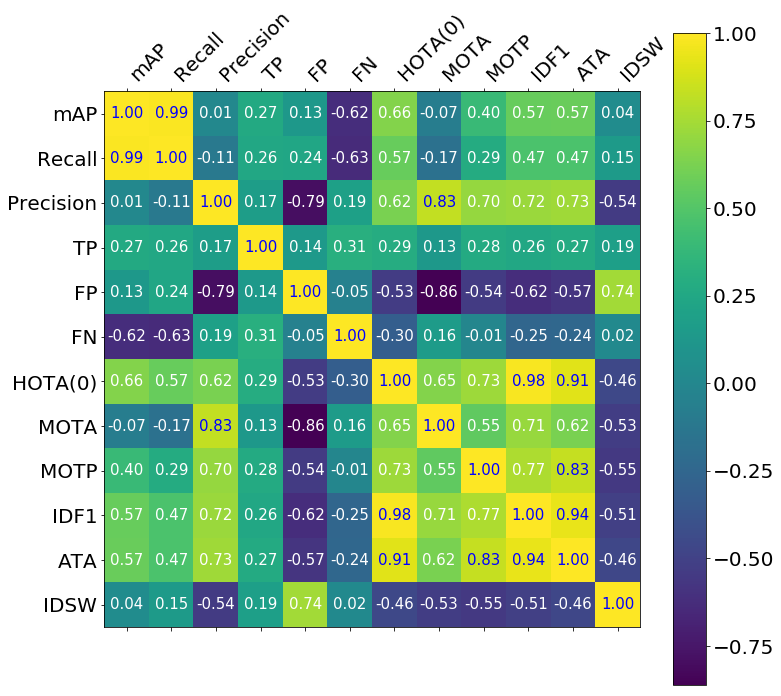

In [6]:
deep_sort = aux.search(tb, 'deep_sort')
result_m = aux.correlation_metrics(deep_sort, metrics)

aux.plot_matrix(result_m, metrics)

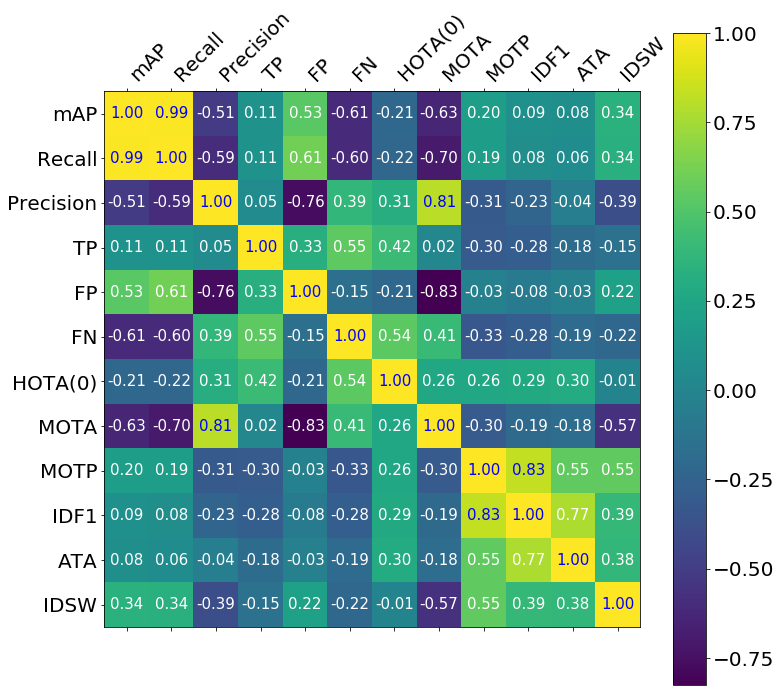

In [4]:
UMA = aux.search(tb, 'uma')
result_m = aux.correlation_metrics(UMA, metrics)

aux.plot_matrix(result_m, metrics)

## Tables of data

In [7]:
m = aux.search(tb, 'sort', 'faster_rcnn')
m[['mAP', 'Precision', 'Recall', 'TP', 'FP', 'FN', 'HOTA(0)', 'MOTA', 'MOTP', 'IDF1', 'IDSW', 'ATA']]

,mAP,Precision,Recall,TP,FP,FN,HOTA(0),MOTA,MOTP,IDF1,IDSW,ATA
0,41.686243,37.103031,51.439169,13868,23509,13092,0.310986,-0.226952,0.754278,0.238481,482,0.018570
1,54.103815,56.480588,61.207484,40400,31129,25605,0.519879,0.076792,0.793972,0.425914,351,0.043214
2,64.077723,24.408495,72.775342,5643,17476,2111,0.468969,-0.261963,0.745297,0.371435,303,0.062577
3,67.048168,31.096708,72.306902,4222,9355,1617,0.473520,0.056150,0.804811,0.393205,96,0.038059
4,65.413921,27.925553,74.389045,10593,27340,3647,0.309919,-0.151180,0.733402,0.211041,714,0.012892
5,67.183533,23.260798,74.122715,7055,23275,2463,0.480671,-0.357143,0.816446,0.356835,158,0.035124
6,64.736747,28.949464,76.354798,12723,31226,3940,0.320055,-1.046641,0.729137,0.221308,538,0.030688


In [8]:
m = aux.search(tb, 'sort', 'faster_rcnn-fine-tune')
m[['mAP', 'Precision', 'Recall', 'TP', 'FP', 'FN', 'HOTA(0)', 'MOTA', 'MOTP', 'IDF1', 'IDSW', 'ATA']]

,mAP,Precision,Recall,TP,FP,FN,HOTA(0),MOTA,MOTP,IDF1,IDSW,ATA
7,59.510762,33.888257,71.880564,19379,37806,7581,0.296513,-0.540983,0.748434,0.199557,1039,0.013484
8,71.994412,77.600880,72.664192,47962,13844,18043,0.545801,0.419581,0.815255,0.485745,511,0.054685
9,74.405801,18.562839,81.622388,6329,27766,1425,0.383164,-0.832731,0.768324,0.282728,445,0.042379
10,80.907313,22.173971,84.826169,4953,17384,886,0.370085,-0.888075,0.805904,0.275234,190,0.017640
11,79.539278,27.399269,87.914326,12519,33172,1721,0.271681,-0.525275,0.748866,0.164540,1066,0.010984
12,84.047280,16.403265,89.745745,8542,43533,976,0.372019,-1.292285,0.821594,0.266914,404,0.020035
13,76.004695,34.137328,83.154294,13856,26733,2807,0.340435,-0.760350,0.742038,0.240626,695,0.039589
